Button(description='Next Generation', icon='check', style=ButtonStyle(), tooltip='Next Generation')

Best solution so far:
f(-0.020078431372549055, -0.020078431372549055)=  0.1597499512920848


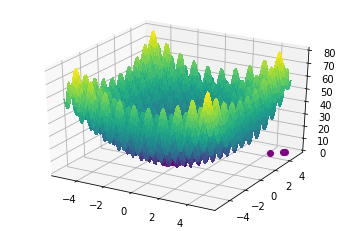

In [4]:
#ExampleGA.ipynb  ->  RastriginFunctionGA.ipynb
#Example of Genetic Algorithm  ->  A Genetic Algorithm to solve the performance test problem "Rastrigin Function"
#Jorge Luis Rosas Trigueros  -> Modified by SergiMartinezR (All comments with double # were made by me)
#Last modified 08oct21 12:26 

import ipywidgets as widgets

def create_button():
  button = widgets.Button(
    description='Next Generation',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Next Generation',
    icon='check' # (FontAwesome names without the `fa-` prefix)
  )
  return button

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import math
import random
import time
import matplotlib.pyplot as plt
import numpy as np
from IPython import display as display

from functools import cmp_to_key
#Chromosomes are 4 bits long
L_chromosome=8
N_chains=2**L_chromosome
#Lower and upper limits of search space
a=-5.12
b=5.12
crossover_point=int(L_chromosome/2)


def random_chromosome():
    chromosome=[]
    for i in range(0,L_chromosome):
        if random.random()<0.1:
            chromosome.append(0)
        else:
            chromosome.append(1)

    return chromosome

#Number of chromosomes
N_chromosomes=10
#probability of mutation
prob_m=0.5

F0=[]
fitness_values=[]

for i in range(0,N_chromosomes):
    F0.append(random_chromosome())
    fitness_values.append(0)

#binary codification
def decode_chromosome(chromosome):
    global L_chromosome,N_chains,a,b
    value=0
    for p in range(L_chromosome):
        value+=(2**p)*chromosome[-1-p]

    return a+(b-a)*float(value)/(N_chains-1)



def f(*X):
    A = 10
    return A*len(X) + sum([(x**2 - A * np.cos(2 * math.pi * x)) for x in X])



def evaluate_chromosomes():
    global F0

    for p in range(N_chromosomes):
        v=decode_chromosome(F0[p])
        fitness_values[p]=f(v,v)
        

def compare_chromosomes(chromosome1,chromosome2):
    vc1=decode_chromosome(chromosome1)
    vc2=decode_chromosome(chromosome2)
    fvc1=f(vc1, vc1)
    fvc2=f(vc2, vc2)
    if fvc1 > fvc2:
        return 1
    elif fvc1 == fvc2:
        return 0
    else: #fvg1<fvg2
        return -1


suma=float(N_chromosomes*(N_chromosomes+1))/2.

Lwheel=N_chromosomes*10

def create_wheel():
    global F0,fitness_values

    maxv=max(fitness_values)
    acc=0
    for p in range(N_chromosomes):
        acc+=maxv-fitness_values[p]
    fraction=[]
    for p in range(N_chromosomes):
        fraction.append( float(maxv-fitness_values[p])/acc)
        if fraction[-1]<=1.0/Lwheel:
            fraction[-1]=1.0/Lwheel
#    print fraction
    fraction[0]-=(sum(fraction)-1.0)/2
    fraction[1]-=(sum(fraction)-1.0)/2
#    print fraction

    wheel=[]

    pc=0

    for f in fraction:
        Np=int(f*Lwheel)
        for i in range(Np):
            wheel.append(pc)
        pc+=1

    return wheel
        
F1=F0[:]

def nextgeneration(b):
    display.clear_output(wait=True)
    display.display(button)
    F0.sort(key=cmp_to_key(compare_chromosomes) )
    print( "Best solution so far:")
    print( "f("+ str(decode_chromosome(F0[0])) + ", " + str(decode_chromosome(F0[0])) + ")= ", f(decode_chromosome(F0[0]), decode_chromosome(F0[0])) )
                                                                    
    #elitism, the two best chromosomes go directly to the next generation
    F1[0]=F0[0]
    F1[1]=F0[1]
    for i in range(0,int((N_chromosomes-2)/2)):
        roulette=create_wheel()
        #Two parents are selected
        p1=random.choice(roulette)
        p2=random.choice(roulette)
        #Two descendants are generated
        o1=F0[p1][0:crossover_point]
        o1.extend(F0[p2][crossover_point:L_chromosome])
        o2=F0[p2][0:crossover_point]
        o2.extend(F0[p1][crossover_point:L_chromosome])
        #Each descendant is mutated with probability prob_m
        if random.random() < prob_m:
            o1[int(round(random.random()*(L_chromosome-1)))]^=1
        if random.random() < prob_m:
            o2[int(round(random.random()*(L_chromosome-1)))]^=1
        #The descendants are added to F1
        F1[2+2*i]=o1
        F1[3+2*i]=o2

    graph_population(F1)
    #The generation replaces the old one
    F0[:]=F1[:]

def graph_f():
    xini=-5.12
    xfin=5.12
    x=np.linspace(xini,xfin,100)
    y=np.linspace(xini,xfin,100)
    x, y = np.meshgrid(x, y)
    z = f(x, y)
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap="viridis", linewidth=0, antialiased=False)

def graph_population(F):
    x=list(map(decode_chromosome,F))
    graph_f()
    plt.plot(x,x,'go', color = 'purple')

button=create_button()
button.on_click(nextgeneration)
display.display(button)

x=list(map(decode_chromosome,F0))
y_population=np.zeros(N_chromosomes)
graph_f()
plt.plot(x,y_population,'go', color = 'purple')
F0.sort(  key=cmp_to_key(compare_chromosomes))
evaluate_chromosomes()